# True Self-Avoiding Walk in One Dimension

In one-dimensional true self-avoiding walk, the walker can jump to one of its two nearest neighbors with a probability that depends on the number  of times these neighbors have been already visited. Suppose that the walker is at site $i$ at step $N$. The probability that the walker will jump to site $i+1$ at step $N+1$ is given by

$$ p_{i \to i +1} = \frac{\text{exp}(-gn_{i+1})}{\text{exp}(-gn_{i+1}) + \text{exp}(-gn_{i-1})},$$

where $n_{i\pm 1}$ is the number of times that the walker has already visited site $i\pm 1$. The probability to jump to site $i-1$ is given by 

$$ p_{i \to i - 1} = 1 - p_{i \to i +1}$$

The parameter $g$ is the strength with which the walk avoids itself.  The limit $g = 0$ corresponds to the usual random walk and very large $g \to \infty$ correponds to self-avoiding walk in one dimension.

We would like to obtain the following observables:

- The mean-squared displacement of the walker after $N$ steps.
- The mean number of distinct sites visited during the course of $N$ step walk
- The probability that the displacement of the walker from the origin is $x$ after $N$ steps.

In [1]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/true_self_avoiding_walk_1d.py'

## 1. Trajectories

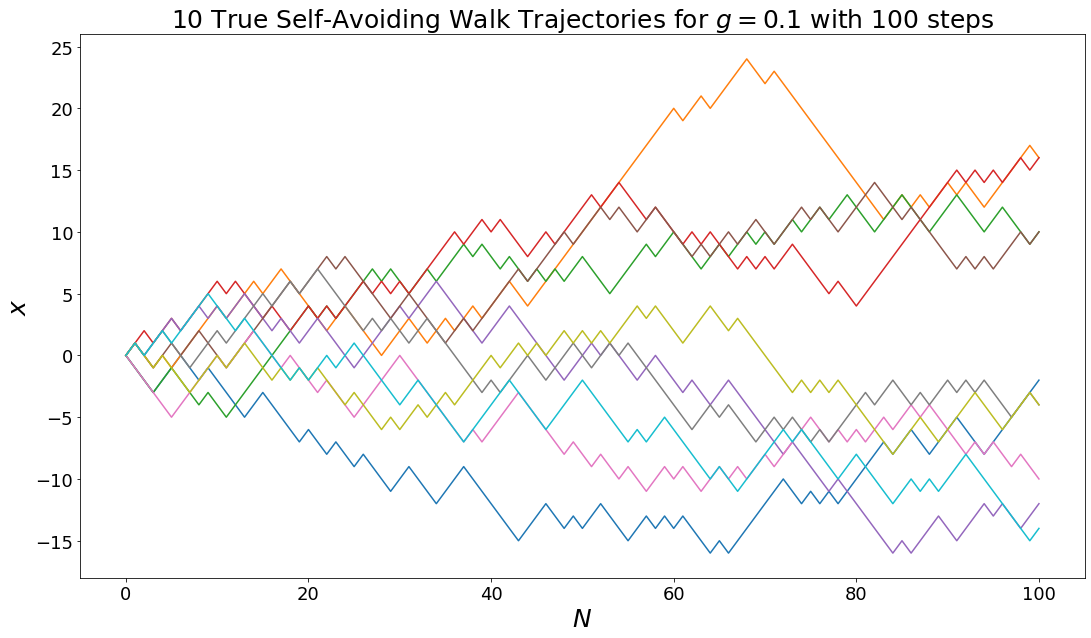

In [3]:
plt.subplots(figsize=(18, 10))
walk_1d = TrueSelfAvoidingWalk1D(nsteps = 10**2, ntrials = 10**3, g = 0.1)
x_arr, _, _, _ = walk_1d.monte_carlo()

for i in range(10):
    plt.plot(range(len(x_arr[i,:])), x_arr[i,:])

plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'10 True Self-Avoiding Walk Trajectories for $g=0.1$ with 100 steps', fontsize = 25)
plt.savefig('../img/sfig.png')
plt.savefig('../img/sfig.pdf')
plt.show()

## 2A. Mean-Squared Displacement 

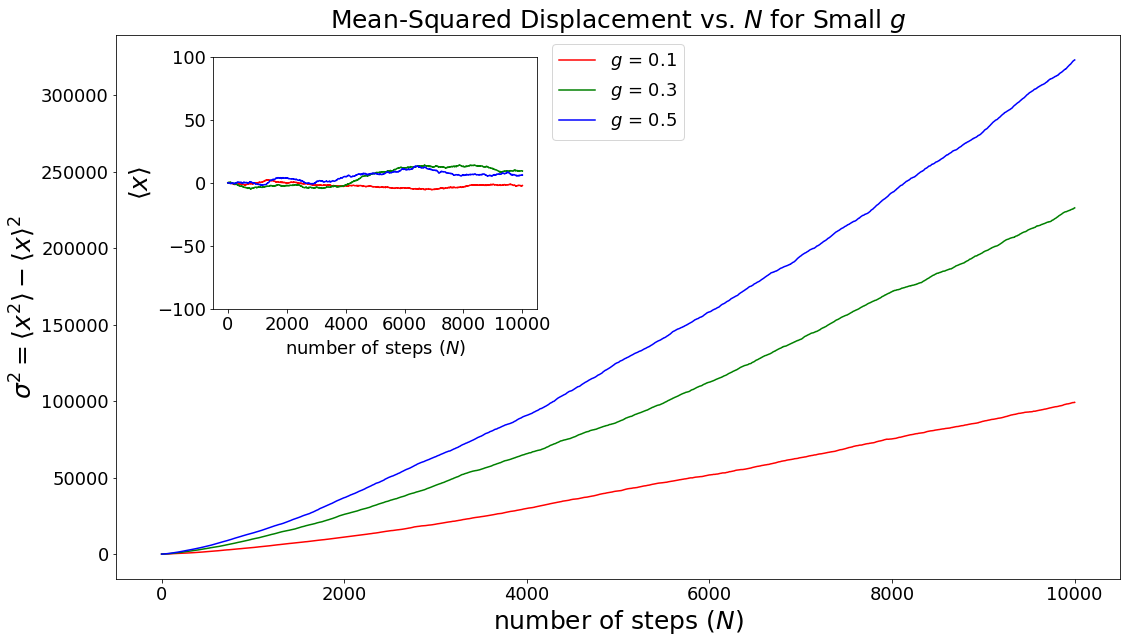

In [158]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.5,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])
color = ['r', 'g', 'b']
g = [0.1, 0.3, 0.5]

for i in range(len(g)):
    walk_1d = TrueSelfAvoidingWalk1D(nsteps = 10**4, ntrials = 10**3, g = g[i])
    _, _, xbar, sigma2 = walk_1d.monte_carlo()
    ax1.plot(range(len(sigma2)), sigma2,label = r"$g$ = {0:.2g}".format(g[i]), color = color[i])
    ax2.plot(range(len(xbar)), xbar, color = color[i])

ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement vs. $N$ for Small $g$', fontsize = 25)
ax1.legend(loc = 'upper center')
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\langle x\rangle$', fontsize = 25)
ax2.set_ylim([-100,100])
plt.savefig('../img/sfig1a.png')
plt.savefig('../img/sfig1a.pdf')
plt.show()

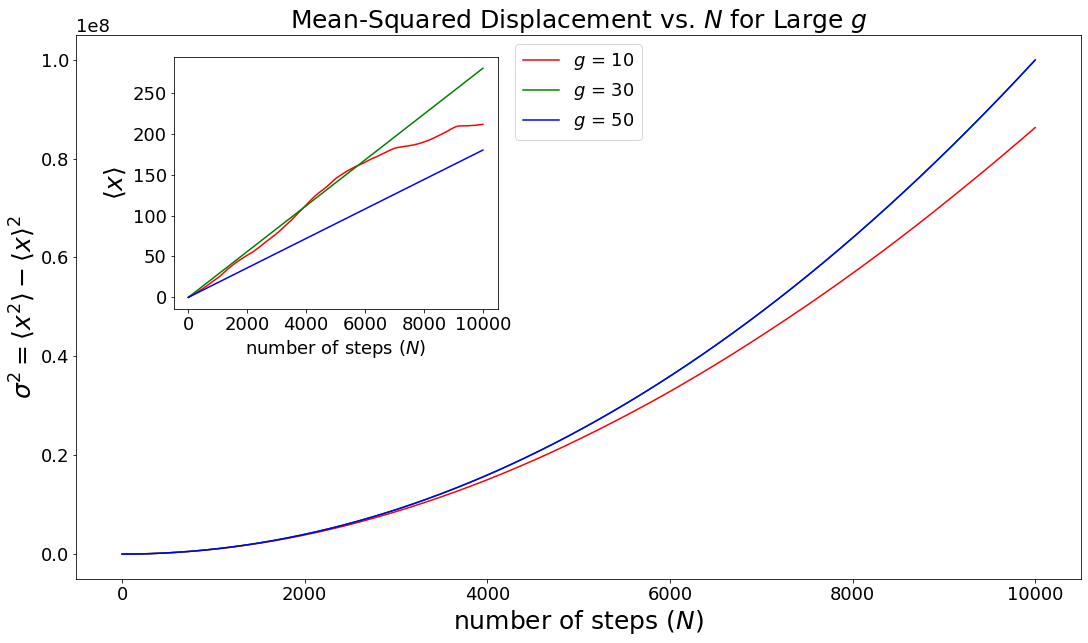

In [159]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.5,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])
color = ['r', 'g', 'b']
g = [10, 30, 50]

for i in range(len(g)):
    walk_1d = TrueSelfAvoidingWalk1D(nsteps = 10**4, ntrials = 10**3, g = g[i])
    _, _, xbar, sigma2 = walk_1d.monte_carlo()
    ax1.plot(range(len(sigma2)), sigma2,label = r"$g$ = {0:.2g}".format(g[i]), color = color[i])
    ax2.plot(range(len(xbar)), xbar, color = color[i])

ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement vs. $N$ for Large $g$', fontsize = 25)
ax1.legend(loc = 'upper center')
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\langle x\rangle$', fontsize = 25)
# ax2.set_ylim([-1000,1000])
plt.savefig('../img/sfig1b.png')
plt.savefig('../img/sfig1b.pdf')
plt.show()

## 2B. Power-Law Scaling

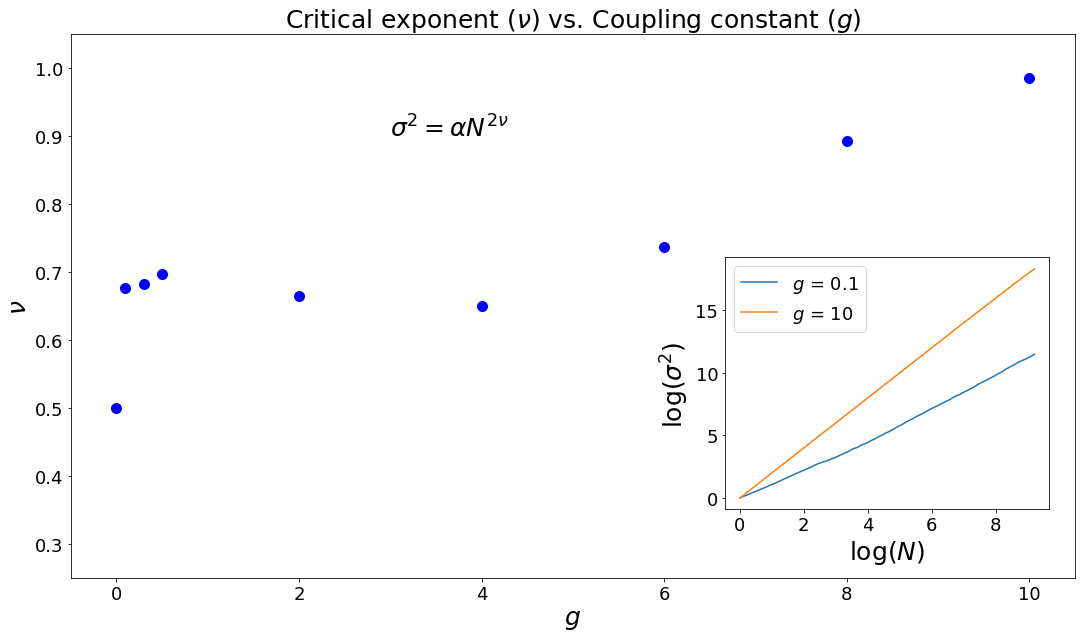

In [149]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.22,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# array parameters
g = np.array([0,0.1,0.3,0.5,2,4,6,8,10])
nu = np.zeros(len(g))
color = ['r', 'b']

for i in range(len(g)):
    walk_1d = TrueSelfAvoidingWalk1D(nsteps = 10**4, ntrials = 10**3, g = g[i])
    _, _, xbar, sigma2 = walk_1d.monte_carlo()
        
    # extract slope and intercept
    m, c = np.polyfit(np.log(np.arange(1, len(sigma2))), np.log(sigma2[1:]), 1) 
    nu[i] = m/2 # compute critical exponent 
    
    if i==1 or i==len(g)-1:
        ax2.plot(np.log(np.arange(1, len(sigma2))), np.log(sigma2[1:]), 
                 label = r"$g$ = {0:.2g}".format(g[i]))
        
ax1.plot(g, nu, color = 'b', marker = 'o', linestyle = " ", markersize = 10)
ax1.set_ylim([0.25,1.05])
ax1.set_ylabel(r'$\nu$', fontsize = 25)
ax1.set_xlabel(r'$g$', fontsize = 25)
ax2.set_ylabel(r'log($\sigma^2$)', fontsize = 25)
ax2.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Critical exponent ($\nu$) vs. Coupling constant ($g$)', fontsize = 25)
ax1.text(3, 0.9, r'$\sigma^2 = \alpha N^{2\nu}$', fontsize = 25)
ax2.legend(loc = 'best')
plt.savefig('../img/sfig1e.png')
plt.savefig('../img/sfig1e.pdf')
plt.show()

In [161]:
pd.DataFrame({r'coupling-constant ($g$)':g, r'critical-exponent ($\nu$)':nu})

,coupling-constant ($g$),critical-exponent ($\nu$)
0,0.0,0.499603
1,0.1,0.676525
2,0.3,0.682920
3,0.5,0.696431
4,2.0,0.664355
5,4.0,0.650396
6,6.0,0.736960
7,8.0,0.893126
8,10.0,0.985154


## 3. Mean Number of Distinct Sites Visited

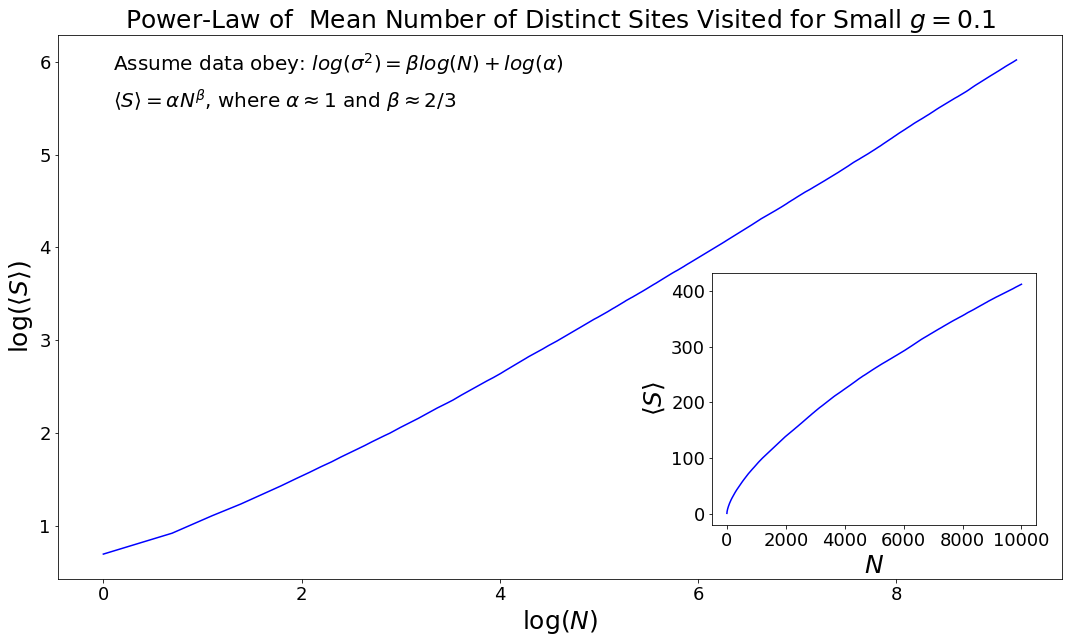

In [228]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

walk_1d = TrueSelfAvoidingWalk1D(nsteps = 10**4, ntrials = 10**3, g = 0.1)
res = walk_1d.average_sites_visited()

# plot data
ax1.plot(np.log(np.arange(1, len(res))), np.log(res[1:]), color = 'b')
ax2.plot(range(len(res)), res, color = 'b')

# extract slope and intercept
mm, cc = np.polyfit(np.log(np.arange(1, len(res))), np.log(res[1:]), 1)

ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of  Mean Number of Distinct Sites Visited for Small $g=0.1$', 
              fontsize = 25)
ax1.text(0.1,5.9, r'Assume data obey: $log(\sigma^2) = \beta log(N) + log(\alpha)$', 
         fontsize = 20)
ax1.text(0.1, 5.5, 
r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1$ and $\beta \approx 2/3$', 
         fontsize = 20)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/sfig2a.png')
plt.savefig('../img/sfig2a.pdf')
plt.show()

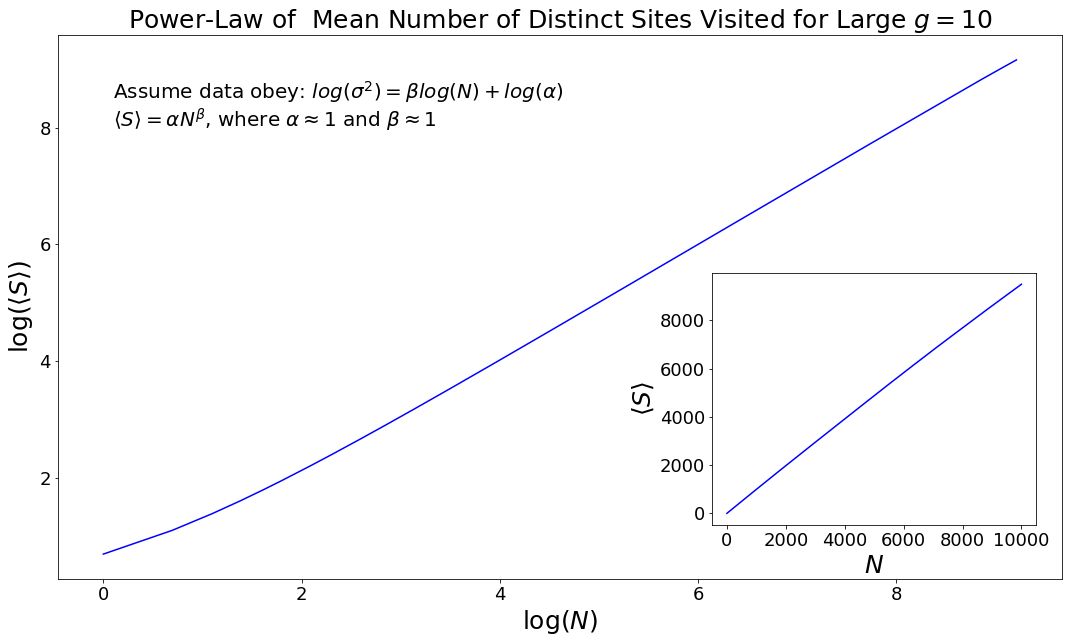

In [220]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

walk_1d_ = TrueSelfAvoidingWalk1D(nsteps = 10**4, ntrials = 10**3, g = 10)
res_ = walk_1d_.average_sites_visited()

# plot data
ax1.plot(np.log(np.arange(1, len(res_))), np.log(res_[1:]), color = 'b')
ax2.plot(range(len(res_)), res_, color = 'b')

# extract slope and intercept
mm_, cc_ = np.polyfit(np.log(np.arange(1, len(res_))), np.log(res_[1:]), 1)

# ax1.set_xlim([0,6])
# ax1.set_ylim([0,3])
ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_title(r'Power-Law of Mean Number of Distinct Sites Visited for Large $g=10$',fontsize = 25)
ax1.text(0.1,8.5, r'Assume data obey: $log(\sigma^2) = \beta log(N) + log(\alpha)$', fontsize = 20)
ax1.text(0.1, 8, 
r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1$ and $\beta \approx 1$', 
         fontsize = 20)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
ax2.set_xlabel(r'$N$', fontsize = 25)
plt.savefig('../img/sfig2b.png')
plt.savefig('../img/sfig2b.pdf')
plt.show()

## 4. Probability Distribution

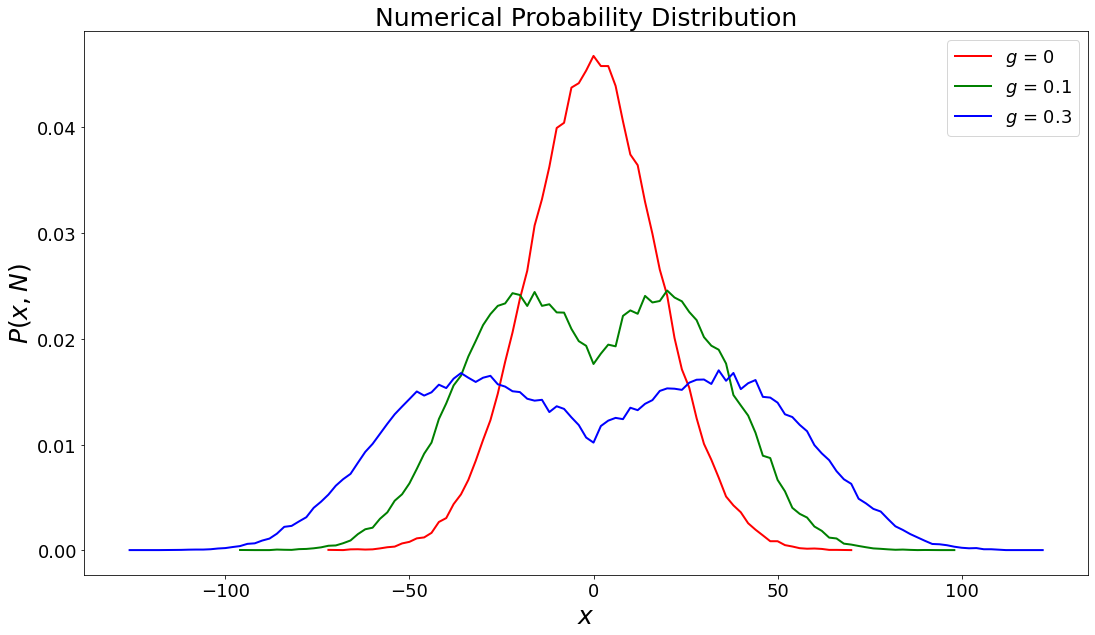

In [248]:
fig, ax = plt.subplots(figsize=(18, 10))
color = ['r', 'g', 'b']
g = [0, 0.1, 0.3]
nsteps = 3*10**2
ntrials = 10**5

for i in range(len(g)):
    walk_1d = TrueSelfAvoidingWalk1D(nsteps = nsteps, ntrials = ntrials, g = g[i])
    _, hashmap, _, _ = walk_1d.monte_carlo()
    x_dist = pd.DataFrame({'x':hashmap.keys(), 'val':[x/ntrials for x in hashmap.values()]})
    x_dist = x_dist.groupby(['x']).mean()
    pd.Series(x_dist.val, index = x_dist.index).plot(ax = ax,linewidth = 2, color = color[i],
                                  label = r"$g$ = {0:.2g}".format(g[i]))
plt.xlabel(r'$x$', fontsize = 25)
plt.ylabel(r'$P(x,N)$', fontsize = 25)
plt.title(r'Numerical Probability Distribution', fontsize = 25)
plt.legend(loc = 'best')
plt.savefig('../img/sfig3a.png')
plt.savefig('../img/sfig3a.pdf')
plt.show()

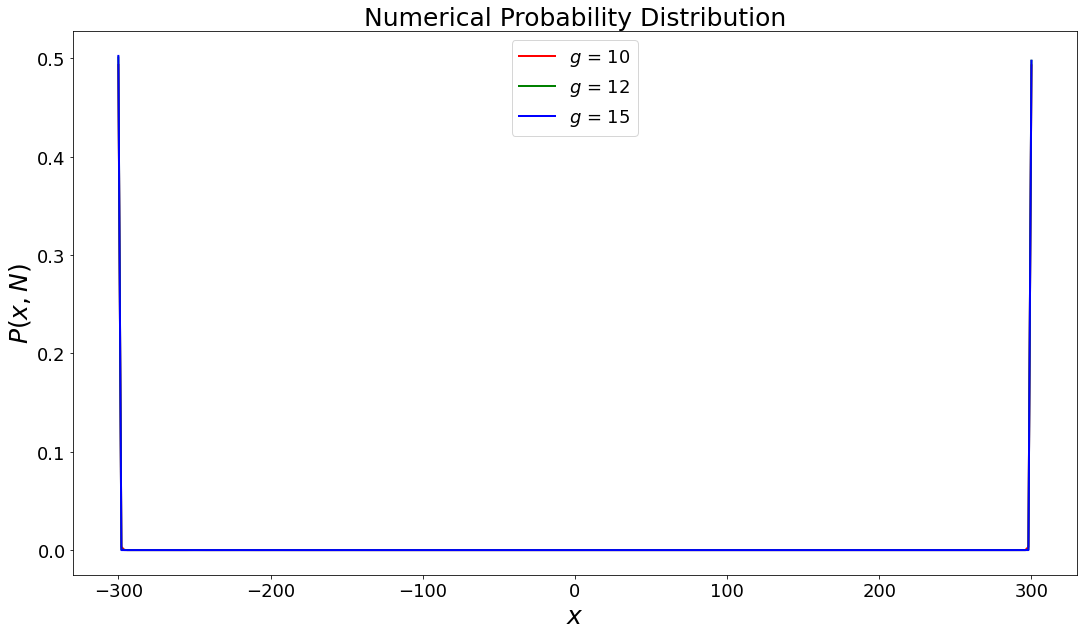

In [250]:
fig, ax = plt.subplots(figsize=(18, 10))
color = ['r', 'g', 'b']
g = [10, 12, 15]
nsteps = 3*10**2
ntrials = 10**5

for i in range(len(g)):
    walk_1d = TrueSelfAvoidingWalk1D(nsteps = nsteps, ntrials = ntrials, g = g[i])
    _, hashmap, _, _ = walk_1d.monte_carlo()
    x_dist = pd.DataFrame({'x':hashmap.keys(), 'val':[x/ntrials for x in hashmap.values()]})
    x_dist = x_dist.groupby(['x']).mean()
    pd.Series(x_dist.val, index = x_dist.index).plot(ax = ax,linewidth = 2, color = color[i],
                                  label = r"$g$ = {0:.2g}".format(g[i]))
plt.xlabel(r'$x$', fontsize = 25)
plt.ylabel(r'$P(x,N)$', fontsize = 25)
plt.title(r'Numerical Probability Distribution', fontsize = 25)
plt.legend(loc = 'best')
plt.savefig('../img/sfig3b.png')
plt.savefig('../img/sfig3b.pdf')
plt.show()